# ChatGPT Prompt Engineering for Developers

### 1. Guidelines for Prompting


we'll see two prompting principles and their related tactics in order to write effective prompts for large language models. I am using openai library and the `gpt-3.5-turbo` model.The notebook is set in Deeplearning.ai tutorial environment so i the API key is already set for the given environment. 

For running in your local machine or your environment use own API key ,  refer the link and also Use the code block below , paste your API key 

[How to get an OpenAI API key](https://www.windowscentral.com/software-apps/how-to-get-an-openai-api-key)

`import openai
openai.api_key = "...your API key here..."` 


In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [2]:
# helper function,  we will use OpenAI's gpt-3.5-turbo model

def get_completion(prompt, model = 'gpt-3.5-turbo'):
    messages = [{"role": "user","content":prompt}]
    response = openai.ChatCompletion.create(
        model = model,
        messages = messages,
        temperature = 0, # degree of randomness
    )
    return response.choices[0].message["content"]
    

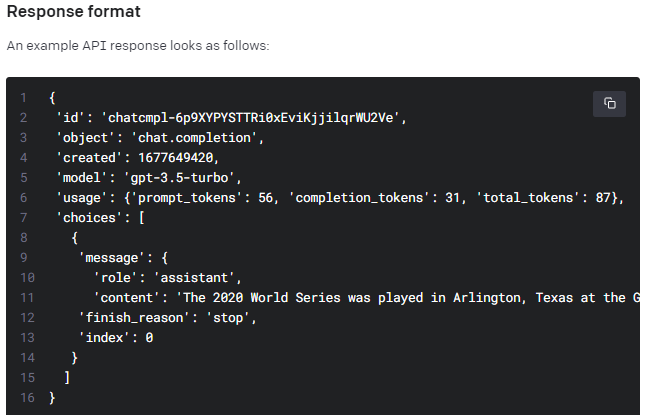

### Prompting principles 
* Write clear instructions 
* Give model time and space to think 

The reason GPT-3 fails on math problems is that , it should respond within the time it has to generate the next token. Giving the model enough time to think will make the response more accurate and better.
##### Tactics

**Tactic 1: Use delimiters to clearly indicate distinct parts of the input**
Use delimiters , like: `""" , <> , <tag> </tag>, ; , / `etc

Here is an example where we prompt a question from a short story called **Towrads Freedom** 

In [3]:
text = """ "Jana gana mana …" The schoolboy squirmed./
Another two minutes? He knew he should stand at attention./
The drillmaster's cane loomed large."Vindhya Himachal …"He grunted in discomfort./
This was unbearable. He considered making a dash; after all he was in the last row./
What if the master noticed? The cane loomed again. He gritted his teeth."Tava shubha …"This is it./
He cast his eyes around."Jaya he …"He started running."Jaya he …"He was almost there./
"Jaya he …"The chorus floated from afar./
He was already in the toilet, heaving a relieved sigh./"""

prompt = f""" What is this short story about? {text}"""

response = get_completion(prompt)
print(response)

This short story is about a schoolboy who is struggling to stand at attention during the national anthem. He considers making a dash for it but is afraid of getting caught by the drillmaster. In the end, he runs to the toilet to avoid standing for the rest of the anthem.


**Tactic 2: Ask for a structured output**

We can also ask the model to have provide structured output , lets say JSON here is an example of getting top ML courses to learn from in JSON and also a description about them

In [4]:
prompt = f"""Generate a list of top 3 Machine Learing courses to learn from.\
            Provide them in a JSON format with Name and Description.\
            the Description should have a 10 word review of the course"""

response = get_completion(prompt)
print(response)

{
  "courses": [
    {
      "name": "Machine Learning by Andrew Ng",
      "description": "A comprehensive introduction to machine learning. Highly recommended.",
    },
    {
      "name": "Applied Data Science with Python",
      "description": "Learn to apply machine learning techniques using Python. Practical and useful.",
    },
    {
      "name": "Deep Learning Specialization",
      "description": "A series of courses on deep learning. Challenging but rewarding.",
    }
  ]
}


**Tactic 3: Ask the model to check whether conditions are satisfied**

Give prompt where we ask the model to output in a step-by-step format , here is an example for making biriyani

In [13]:
text_1 = """ Making biriyani is easy you need to get some rice and/
            water , then boil the rice. Take chicken and apply /
            masala . Meanwhile take the rice and mix masala in it./
            After that take the chiken fry it and put it in rice./
            At the end add spices and serve hot."""

prompt = f"""You will be provided with a recipie for chicken biriyani.
            Re-create the recipie in a sequence of instructions like 
            Step 1 : ...
            Step 2 : ...
            Step 3 : ...
            ...
            Step N :
            If needed add more steps and ingredents to make the biriyani/
            more tasty.
            If the text is empty simple respind \"NONE"\ {text_1} """

response = get_completion(prompt)
print(response)

Step 1: Rinse 2 cups of basmati rice in cold water and soak it for 30 minutes.
Step 2: In a pot, bring 4 cups of water to a boil and add the soaked rice. Cook until the rice is 70% done.
Step 3: Drain the rice and set it aside.
Step 4: In a separate pan, heat 2 tablespoons of oil and add 2 sliced onions. Fry until golden brown.
Step 5: Add 1 tablespoon of ginger-garlic paste and fry for 1 minute.
Step 6: Add 2 chopped tomatoes and cook until they are soft.
Step 7: Add 1 teaspoon of turmeric powder, 1 teaspoon of red chili powder, 1 teaspoon of cumin powder, 1 teaspoon of coriander powder, and salt to taste. Mix well.
Step 8: Add 500 grams of chicken pieces and mix well. Cook until the chicken is tender.
Step 9: In a separate pan, heat 2 tablespoons of ghee and add 2 sliced onions. Fry until golden brown.
Step 10: Add the cooked chicken to the pan with the fried onions and mix well.
Step 11: In a large pot, layer the rice and chicken mixture. Start with a layer of rice, then a layer of 

Well that recipie was better and also notice how the output has been formated in the way specified.


**Tactic 4: "Few-shot" prompting**

Similar to `few-shot learning` , we give the model few exaples to learn, from which the model will further generate output.

In [17]:
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \ 
valley flows from a modest spring; the \ 
grandest symphony originates from a single note; \ 
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""                         

response = get_completion(prompt)
print(response)

<grandparent>: Resilience is like a tree that bends with the wind but never breaks. It is the ability to bounce back from adversity and keep moving forward, even when things get tough. Just like a tree that grows stronger with each storm it weathers, resilience is a quality that can be developed and strengthened over time.


### Give the model time to “think”

**Tactic 1: Specify the steps required to complete a task**

This also include asking the model for a specific outformat , this will help model slow down and think 